In [1]:
import os
import json
import math
from statistics import mean
from scipy.signal import medfilt
import matplotlib.pyplot as plt
from IPython.display import Video

In [2]:
f = open("../result_files/video_prediction_results.json")
annotations = json.load(f)

In [26]:
video_index = 8
median_filter_size = 75 # 25 corresponds to 1 seconds

In [27]:
video_name = annotations[video_index]["video_name"]
video_path = os.path.join("../../IBD/data_only_video_scores", video_name, "video/video.mp4")
print(video_name)

UC76-4.mp4


In [5]:
Video(video_path, width=960, height=540)

In [6]:
def get_ratios(scores):
    size = len(scores)
    unique_items = sorted(list(set(scores)))
    score_ratios = {}
    for item in unique_items:
        score_ratios[item] = scores.count(item)/size
    return score_ratios

In [7]:
def calculate_final_score(score_ratios, subscore_type=0):
    """
    subscore_type: 0=Vacular Pattern (0-2)
                   1=Bleeding (0-3)
                   2=Erosion (0-3)
    """
    VP_threshold_2 = 0.20
    VP_threshold_2_1 = 0.25
    
    B_threshold_3 = 0.20
    B_threshold_3_2 = 0.20
    B_threshold_3_2_1 = 0.25
    
    if subscore_type == 0:
        if score_ratios.get(2, 0) > VP_threshold_2:
            return 2
        elif (score_ratios.get(2, 0)+score_ratios.get(1, 0)) > VP_threshold_2_1:
            return 1
        else:
            return 0        
    elif subscore_type == 1 or subscore_type == 2:
        if score_ratios.get(3, 0) > B_threshold_3:
            return 3
        elif (score_ratios.get(3, 0)+score_ratios.get(2, 0)) > B_threshold_3_2:
            return 2
        elif (score_ratios.get(3, 0)+score_ratios.get(2, 0)+score_ratios.get(1, 0)) > B_threshold_3_2_1:
            return 1
        else:
            return 0
    else:
        raise Exception("No subscore_type as "+str(subscore_type)+". Valid subscore_types: 0, 1, 2.")
    

In [8]:
print("mean values")
print("VP:"+ "{:3.2f}".format(mean(annotations[video_index]["Vascular_Pattern"]))+" | "+
      "Bleeding:"+ "{:3.2f}".format(mean(annotations[video_index]["Bleeding"]))+" | "+
      "Erosion:"+ "{:3.2f}".format(mean(annotations[video_index]["Erosion"])))
print("Total time: "+str(len(annotations[video_index]["Vascular_Pattern"])/25.0)+" seconds => "+str(len(annotations[video_index]["Vascular_Pattern"])/(60.0*25))+" mins")

mean values
VP:1.94 | Bleeding:1.36 | Erosion:1.08
Total time: 55.32 seconds => 0.922 mins


In [9]:
Vascular_Pattern_thresholded = medfilt(annotations[video_index]["Vascular_Pattern"], median_filter_size)
Bleeding_thresholded = medfilt(annotations[video_index]["Bleeding"], median_filter_size)
Erosion_thresholded = medfilt(annotations[video_index]["Erosion"], median_filter_size)

Vascular_Pattern_thresholded = [int(item) for item in Vascular_Pattern_thresholded]
Bleeding_thresholded = [int(item) for item in Bleeding_thresholded]
Erosion_thresholded = [int(item) for item in Erosion_thresholded]

In [10]:
x_axis = [x/25.0 for x in range(len(annotations[video_index]["Vascular_Pattern"]))]
x_ticks = [x for x in range(int(math.ceil(len(annotations[video_index]["Vascular_Pattern"])/25.0)))]

{0: 0.0014461315979754157, 1: 0.05712219812002892, 2: 0.9414316702819957}
2
{1: 0.04338394793926247, 2: 0.9566160520607375}
2


Text(0.5, 0.98, 'Vascular Pattern')

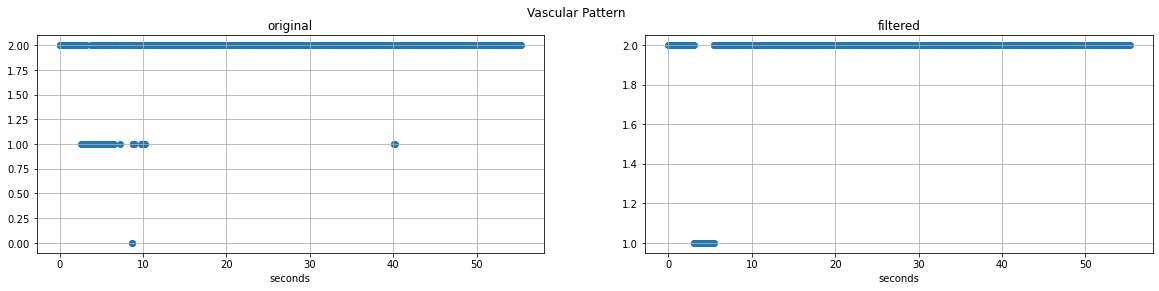

In [11]:
original_ratios = get_ratios(annotations[video_index]["Vascular_Pattern"])
filtered_ratios = get_ratios(Vascular_Pattern_thresholded)


print(original_ratios)
print(calculate_final_score(original_ratios, 0))
print(filtered_ratios)
print(calculate_final_score(filtered_ratios, 0))

fig, axs = plt.subplots(1,2, figsize=(20, 4))
axs[0].set_title("original")
axs[0].set_xlabel("seconds")
# axs[0].set_xticks(x_ticks)
axs[0].scatter(x_axis, annotations[video_index]["Vascular_Pattern"])
axs[0].grid()

axs[1].set_title("filtered")
axs[1].set_xlabel("seconds")
# axs[1].set_xticks(x_ticks)
axs[1].scatter(x_axis, Vascular_Pattern_thresholded)
axs[1].grid()
plt.suptitle("Vascular Pattern")

{0: 0.023138105567606652, 1: 0.5936370209689081, 2: 0.3825018076644975, 3: 0.0007230657989877079}
2
{1: 0.665943600867679, 2: 0.33405639913232105}
2


Text(0.5, 0.98, 'Bleeding')

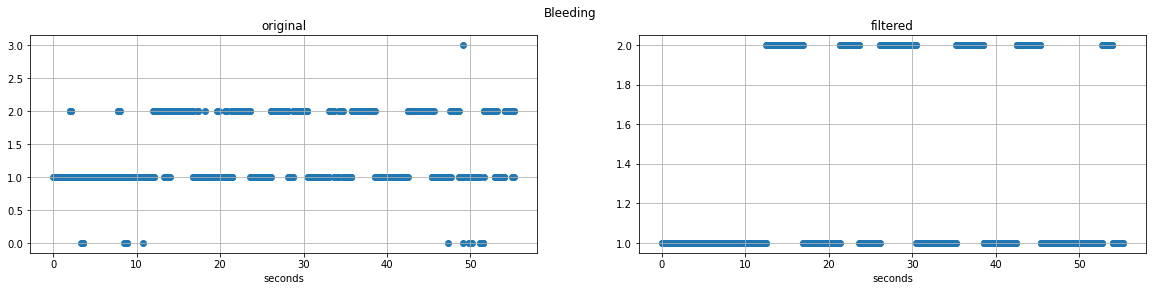

In [12]:
original_ratios = get_ratios(annotations[video_index]["Bleeding"])
filtered_ratios = get_ratios(Bleeding_thresholded)

print(original_ratios)
print(calculate_final_score(original_ratios, 1))
print(filtered_ratios)
print(calculate_final_score(filtered_ratios, 1))

fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].set_title("original")
axs[0].set_xlabel("seconds")
# axs[0].set_xticks(x_ticks)
axs[0].scatter(x_axis, annotations[video_index]["Bleeding"])
axs[0].grid()

axs[1].set_title("filtered")
axs[1].set_xlabel("seconds")
# axs[1].set_xticks(x_ticks)
axs[1].scatter(x_axis, Bleeding_thresholded)
axs[1].grid()
plt.suptitle("Bleeding")

{0: 0.14967462039045554, 1: 0.7302964569775849, 2: 0.010845986984815618, 3: 0.10918293564714389}
1
{0: 0.14533622559652928, 1: 0.7418655097613883, 2: 0.0072306579898770785, 3: 0.10556760665220535}
1


Text(0.5, 0.98, 'Erosion')

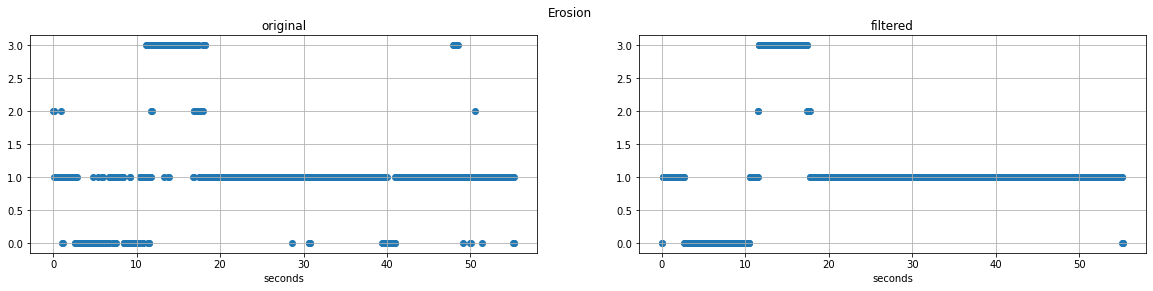

In [13]:
original_ratios = get_ratios(annotations[video_index]["Erosion"])
filtered_ratios = get_ratios(Erosion_thresholded)

print(original_ratios)
print(calculate_final_score(original_ratios, 2))
print(filtered_ratios)
print(calculate_final_score(filtered_ratios, 2))

fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].set_title("original")
axs[0].set_xlabel("seconds")
# axs[0].set_xticks(x_ticks)
axs[0].scatter(x_axis, annotations[video_index]["Erosion"])
axs[0].grid()

axs[1].set_title("filtered")
axs[1].set_xlabel("seconds")
# axs[1].set_xticks(x_ticks)
axs[1].scatter(x_axis, Erosion_thresholded)
axs[1].grid()
plt.suptitle("Erosion")